Name: Samson Yu Bai Jian<br>
Student ID: 1002819

# 1. K-Means [30 points]

In [1]:
# INSTRUCTION: Put the path of the "hw2-image.txt" file here
data_file = 'hw2_data/HW2_data/1/hw2-image.txt'

def squared_euclidean_distance(x1,x2):
    assert len(x1) == len(x2)
    
    distance = 0
    
    for i in range(len(x1)):
        distance += abs((x1[i]-x2[i])**2)
    
    return distance

def compute_centroid(points):
    # If no points are closed to a centroid, remove centroid
    if len(points) == 0:
        return False
    
    dim = len(points[0])
    length = len(points)
    
    total = [0 for _ in range(dim)]
    
    for p in points:
        for d in range(dim):
            total[d] += p[d]
            
    for d in range(dim):
        total[d] = total[d]/length
        
    return total

def k_means(data_file, k, centroids):
    assert k == len(centroids) and k > 0
    
    # Data handling
    raw_data = open(data_file, 'r')
    data = [list(map(int, line.strip('\n').split(' '))) for line in raw_data.readlines()]
    
    # Set class label for each datapoint
    class_labels = [None for _ in data]
    
    # Create distance list for plotting
    distance_list = []
        
    iter_count = 0
    
    print("Training...\n")
    
    while True:
        # Assign each instance to class with nearest centroid
        avg_distance = 0
        class_points_dict = {}
        for i in range(k):
            class_points_dict[i] = []
        for j in range(len(data)):
            for i in range(k):
                if i == 0:
                    min_distance = squared_euclidean_distance(data[j],centroids[i])
                    min_class = 0
                else:
                    distance = squared_euclidean_distance(data[j],centroids[i])
                    if distance < min_distance:
                        min_distance = distance
                        min_class = i
            avg_distance += min_distance
            class_labels[j] = min_class
            class_points_dict[min_class].append(data[j])
        
        # Recompute centroid of each class
        temp_centroids = []
        for i in range(k):
            temp_centroids.append(compute_centroid(class_points_dict[i]))
        # Remove centroid(s) of cluster(s) that have no points nearest to them
        final_temp_centroids = []
        for i in range(len(temp_centroids)):
            if temp_centroids[i] != False:
                final_temp_centroids.append(temp_centroids[i])
            else:
                k -= 1
        
        iter_count += 1
        distance_list.append(avg_distance/len(data))
        # print("Iteration " + str(iter_count) + ": number of clusters = " + str(k) + ", SED from each pixel to the nearest centroid = " + str(avg_distance/len(data)))
        print("Iteration " + str(iter_count) + " done.")
        
        # Break when assignments and centroids stop changing
        if final_temp_centroids == centroids:
            print("\nTraining done.")
            break
        else:
            centroids = final_temp_centroids
    
    # return information for (a), (b), (c), (d) and visualisation
    return k, centroids, class_points_dict, distance_list, class_labels

# Initialisation of centroids
initial_centroids = [
    [255, 255, 255],
    [255, 0, 0],
    [128, 0, 0],
    [0, 255, 0],
    [0, 128, 0],
    [0, 0, 255],
    [0, 0, 128],
    [0, 0, 0]
]

final_k, final_centroids, class_points_dict, distance_list, class_labels = k_means(data_file, 8, initial_centroids)

Training...

Iteration 1 done.
Iteration 2 done.
Iteration 3 done.
Iteration 4 done.
Iteration 5 done.
Iteration 6 done.
Iteration 7 done.
Iteration 8 done.
Iteration 9 done.
Iteration 10 done.
Iteration 11 done.
Iteration 12 done.
Iteration 13 done.
Iteration 14 done.
Iteration 15 done.
Iteration 16 done.
Iteration 17 done.
Iteration 18 done.
Iteration 19 done.
Iteration 20 done.
Iteration 21 done.
Iteration 22 done.
Iteration 23 done.
Iteration 24 done.
Iteration 25 done.
Iteration 26 done.
Iteration 27 done.
Iteration 28 done.
Iteration 29 done.
Iteration 30 done.
Iteration 31 done.
Iteration 32 done.
Iteration 33 done.
Iteration 34 done.
Iteration 35 done.
Iteration 36 done.
Iteration 37 done.
Iteration 38 done.
Iteration 39 done.
Iteration 40 done.
Iteration 41 done.
Iteration 42 done.
Iteration 43 done.
Iteration 44 done.
Iteration 45 done.
Iteration 46 done.
Iteration 47 done.
Iteration 48 done.

Training done.


## (a) How many clusters there are in the end. (A cluster can “disappear” in one iteration of the algorithm if no vectors are closest to its centroid.)

In [2]:
final_k

6

## (b) The final centroids of each cluster.

In [3]:
for i in range(len(final_centroids)):
    print("Centroid for cluster " + str(i+1) + " = " + str(final_centroids[i]))

Centroid for cluster 1 = [241.22961460446248, 238.62515212981745, 233.86288032454362]
Centroid for cluster 2 = [194.41158657011192, 136.33311389071758, 90.94364713627387]
Centroid for cluster 3 = [136.2655562958028, 61.08973065575331, 10.103854573141716]
Centroid for cluster 4 = [157.2917327293318, 97.59397508493771, 51.43329558323896]
Centroid for cluster 5 = [78.9274371361328, 37.10828688219993, 13.070704818530906]
Centroid for cluster 6 = [25.978002322570312, 23.235754234686386, 23.605990629630124]


## (c) The number of pixels associated to each cluster.

In [4]:
cluster_pixel_num = [len(class_points_dict[i]) for i in range(final_k)]
for i in range(len(cluster_pixel_num)):
    print("Number of pixels in cluster " + str(i+1) + " = " + str(cluster_pixel_num[i]))

Number of pixels in cluster 1 = 4930
Number of pixels in cluster 2 = 15190
Number of pixels in cluster 3 = 52535
Number of pixels in cluster 4 = 22075
Number of pixels in cluster 5 = 40365
Number of pixels in cluster 6 = 74917


## (d) Plot the squared Euclidean distance from each pixel to the nearest centroid after every iteration of the algorithm.

In [5]:
import matplotlib.pyplot as plt

iter_list = [i for i in range(len(distance_list))]
plt.plot(iter_list, distance_list)
plt.title('Squared Euclidean Distance vs. Iteration')
plt.ylabel('Squared Euclidean Distance')
plt.xlabel('Iteration')
plt.show()

<Figure size 640x480 with 1 Axes>

## Visualize your result by replacing each pixel with the centroid to which it is closest, and displaying the resulting image.

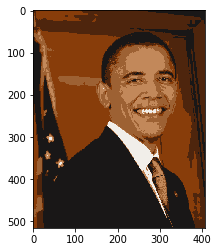

In [6]:
image_dim = (516, 407)

raw_data = open(data_file, 'r')
data = [list(map(int, line.strip('\n').split(' '))) for line in raw_data.readlines()]

# Check that image dimensions and total number of datapoints are equal
assert (len(data) == image_dim[0] * image_dim[1])

data_centroid = []
centroids_colour = []
for fc in final_centroids:
    centroids_colour.append([int(fc[i]) for i in range(len(fc))])
for cl in class_labels:
    data_centroid.append(centroids_colour[cl])

img = []
for i in range(image_dim[0]):
    temp_img = data_centroid[image_dim[1]*i:image_dim[1]*(i+1)]
    img.append(temp_img)
plt.imshow(img)

## 2. K-Mediods [10 points]

A. l∞ distance measure<br>
B. l2 distance measure<br>
C. l1 distance measure

## 3. K-Means vs K-Mediods [10 points]

Advantages of K-medoids:<br>
- Find datapoints close to a certain datapoint, e.g. Google News, since centers are located among the data points themselves
- The l1 distance metric used is more robust against outliers and noise, as it minimises the absolute differences instead of the squared differences; when the l2 loss function tries to adjust the model according to the outlier values, it will place more emphasis on the outliers
- The medoid is closer to the median than the mean, so the medoid a breakdown point of roughly 50%, while the mean has a breakdown point of 1/N, where N is the number of original datapoints (a single large observation can throw it off) <br>

Disadvantages of K-medoids:<br>
- Computationally harder, since recomputation of the medoid in a cluster requires us to set each datapoint in the cluster as the medoid and calculate the sum of the distances between the datapoint and the other datapoints in the cluster
- The clustering solution can depend significantly on the initialisation, and different results may be obtained for each run as K-medoids gives us the local minimum of the cost, which may not be the global optimal solution<br>